In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Random Selection

In [2]:
mornings = make_array('wake up', 'sleep in')

In [3]:
np.random.choice(mornings)

'sleep in'

In [4]:
np.random.choice(mornings, 7)

array(['sleep in', 'wake up', 'wake up', 'sleep in', 'wake up',
       'sleep in', 'sleep in'], dtype='<U8')

In [5]:
sum(np.random.choice(mornings, 7) == 'wake up')

4

## Control Statements: `For`

In [6]:
for day in make_array('Monday', 'Tuesday', 'Wednesday'):
    decision = np.random.choice(mornings)
    print('On ' + day + ' I decided to ' + decision)

On Monday I decided to sleep in
On Tuesday I decided to wake up
On Wednesday I decided to sleep in


## Control Statements: `If`

In [20]:
def happiness(decision):
    if decision == 'wake up':
        possible_outcomes = np.arange(4,7)
        return np.random.choice(possible_outcomes)
    elif decision == 'sleep in':
        possible_outcomes = np.arange(8,11)
        return np.random.choice(possible_outcomes)

In [21]:
happiness('wake up')

5

In [22]:
happiness('sleep in')

10

In [23]:
def simulate_one_outcome():
    decision = np.random.choice(mornings)
    return happiness(decision)

In [24]:
simulate_one_outcome()

6

In [26]:
for i in np.arange(7):
    print(simulate_one_outcome())

8
8
4
9
5
8
4


## Appending Arrays

In [27]:
outcomes = make_array()
outcomes

array([], dtype=float64)

In [28]:
first_day = simulate_one_outcome()
outcomes = np.append(outcomes, first_day)
outcomes

array([9.])

In [29]:
second_day = simulate_one_outcome()
outcomes = np.append(outcomes, second_day)
outcomes

array([ 9., 10.])

## Visualizing Simluations

In [30]:
outcomes = make_array()

for i in np.arange(5):
    outcomes = np.append(outcomes, simulate_one_outcome())
    
outcomes

array([5., 9., 4., 8., 6.])

In [31]:
outcomes = make_array()

for i in np.arange(365):
    outcomes = np.append(outcomes, simulate_one_outcome())
    
outcomes

array([ 6.,  5.,  8.,  4.,  5.,  8.,  4., 10., 10.,  5.,  5.,  5.,  5.,
       10.,  8.,  6.,  8.,  6.,  9.,  5.,  9.,  5.,  6.,  6.,  4.,  9.,
        6.,  6.,  6., 10., 10.,  5.,  6.,  9.,  4.,  5., 10.,  9.,  6.,
        5.,  8.,  9., 10.,  9.,  9.,  6.,  8.,  8.,  9.,  4., 10.,  6.,
        5., 10.,  5.,  9.,  6.,  4.,  8., 10.,  4.,  9.,  6.,  5.,  5.,
        8.,  9.,  4.,  6.,  8.,  9.,  5.,  9.,  4.,  6.,  5., 10.,  6.,
        6.,  4.,  4.,  6.,  5.,  5.,  5.,  5.,  9.,  6.,  6., 10.,  4.,
        8.,  9.,  6.,  5., 10.,  6.,  8.,  5., 10., 10.,  8.,  4.,  9.,
        9.,  5.,  4.,  8.,  4.,  8.,  9.,  8.,  6.,  6.,  9.,  4., 10.,
        6.,  8.,  5.,  9.,  9.,  4., 10.,  6.,  6.,  9., 10.,  4.,  4.,
        6.,  5.,  5.,  8.,  9., 10.,  6.,  8., 10.,  5.,  5.,  6.,  9.,
        6.,  9.,  6.,  4.,  8.,  4.,  9.,  4.,  6.,  9.,  8., 10., 10.,
        9.,  5.,  6.,  5., 10.,  5.,  9.,  8.,  9.,  5., 10.,  9.,  9.,
        4.,  4., 10.,  6.,  4.,  8.,  9.,  8.,  9.,  5.,  6.,  5

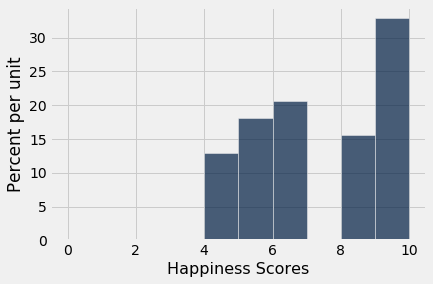

In [32]:
outcomes = Table().with_columns('Happiness Scores', outcomes)
outcomes.hist('Happiness Scores', bins=np.arange(0,11))

## Simulation

In [ ]:
coin = make_array('heads', 'tails')

In [ ]:
np.random.choice(coin)

In [ ]:
np.random.choice(coin, 10)

In [ ]:
np.random.choice(coin, 10) == 'heads'

In [ ]:
sum(np.random.choice(coin, 10) == 'heads')

In [ ]:
# How can we do a simulation of 100 coin tosses, 
# count the number of heads, and
# repeat this 10,000 times?

In [ ]:
# 1. Simulate one outcome

def heads_in_100_tosses():
    return sum(np.random.choice(coin, 100) == 'heads')

In [ ]:
# 2. Decide how many times you want to simluate

num_simulations = 10000

In [ ]:
# 3. Simulate that many outcomes

outcomes = make_array()

for i in np.arange(num_simulations):
    outcomes = np.append(outcomes, heads_in_100_tosses())

In [ ]:
heads = Table().with_columns('Heads', outcomes)
heads.hist('Heads', bins=np.arange(24.5, 76.5))

## Probability

Counting rule

Multiplication rule

Addition rule

Complement rule

## Monty Hall

In [33]:
doors = make_array('car', 'first goat', 'second goat')

In [34]:
goats = make_array('first goat', 'second goat')

def other_goat(a_goat):
    if a_goat == 'first goat':
        return 'second goat'
    elif a_goat == 'second goat':
        return 'first goat'


In [35]:
other_goat('first goat')

'second goat'

In [36]:
other_goat('wheeler hall')

In [37]:
def monty_hall():
    
    contestant_choice = np.random.choice(doors)
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'car':
        monty_choice = np.random.choice(goats)
        remaining_door = other_goat(monty_choice)
        
    return [contestant_choice, monty_choice, remaining_door]

In [38]:
monty_hall()

['first goat', 'second goat', 'car']

In [39]:
games = Table(['Guess', 'Revealed', 'Remaining'])

In [40]:
games.append(monty_hall())

Guess,Revealed,Remaining
first goat,second goat,car


In [41]:
games = Table(['Guess', 'Revealed', 'Remaining'])
for i in range(3000):
    games.append(monty_hall())
    
games

Guess,Revealed,Remaining
car,second goat,first goat
first goat,second goat,car
first goat,second goat,car
car,second goat,first goat
second goat,first goat,car
first goat,second goat,car
first goat,second goat,car
second goat,first goat,car
first goat,second goat,car
first goat,second goat,car


In [42]:
games.group('Remaining')

Remaining,count
car,1976
first goat,514
second goat,510


In [43]:
games.group('Guess')

Guess,count
car,1024
first goat,980
second goat,996
